<a href="https://colab.research.google.com/github/Adarsh12Jaiswal/OIBSIP/blob/main/unemployment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [1]:
# Importing Numpy & Pandas for data processing & data wrangling
import numpy as np
import pandas as pd

# Importing  tools for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import the 'calendar' and 'datetime' module
import calendar
import datetime as dt

# Library used for ignore warnings
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Dataset Loading

In [17]:
df=pd.read_csv("/Unemployment in India.csv")
df

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Dataset First View

In [18]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [19]:
print("Number of rows are: ",df.shape[0])
print("Number of columns are: ",df.shape[1])

Number of rows are:  768
Number of columns are:  7


# Dataset Information

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


# Duplicate Values

In [21]:
dup = df.duplicated().sum()
print(f'number of duplicated rows are {dup}')

number of duplicated rows are 27


# Null value

In [22]:
df.isnull().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

<Axes: >

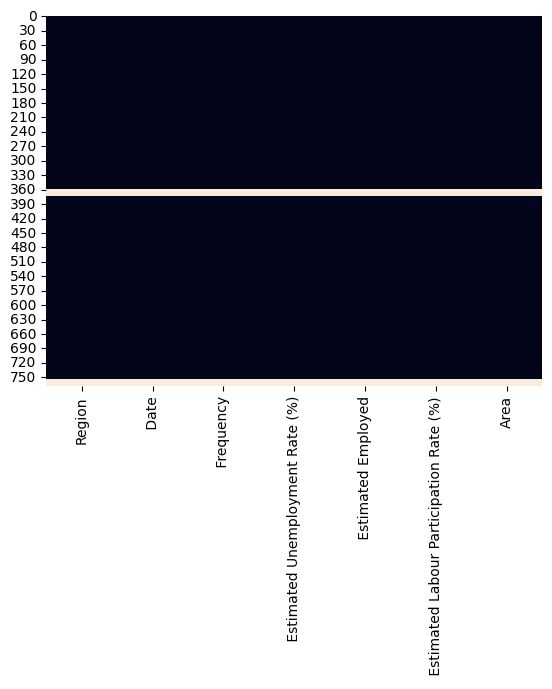

In [23]:
# Checking Null Value by Plotting Heatmap
sns.heatmap(df.isnull(), cbar=False)

# What did i know about the dataset?
The Unemployment dataset consists of Region, Date, Unemployment Rate etc. for Indian states.
There are 768 rows and 7 columns provided in the data.
27 duplicate rows present in the dataset.
28 Null values present in each of the columns available in dataset.

# Understanding The Variables

In [24]:
df.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [25]:
df.describe(include= 'all').round(2)

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
count,740,740,740,740.00,740.00,740.00,740
unique,28,14,2,NaN,NaN,NaN,2
top,Andhra Pradesh,31-10-2019,Monthly,NaN,NaN,NaN,Urban
freq,28,55,381,NaN,NaN,NaN,381
mean,NaN,NaN,NaN,11.79,7204460.03,42.63,NaN
std,NaN,NaN,NaN,10.72,8087988.43,8.11,NaN
min,NaN,NaN,NaN,0.00,49420.00,13.33,NaN
25%,NaN,NaN,NaN,4.66,1190404.50,38.06,NaN
50%,NaN,NaN,NaN,8.35,4744178.50,41.16,NaN
75%,NaN,NaN,NaN,15.89,11275489.50,45.50,NaN


# Check Unique Values for each variable.

In [26]:

# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("No. of unique values in",i,"is",df[i].nunique())


No. of unique values in Region is 28
No. of unique values in  Date is 14
No. of unique values in  Frequency is 2
No. of unique values in  Estimated Unemployment Rate (%) is 624
No. of unique values in  Estimated Employed is 740
No. of unique values in  Estimated Labour Participation Rate (%) is 626
No. of unique values in Area is 2


# Data Wrangling Code

In [27]:
# Rename the columns of the DataFrame
df.columns = ['States', 'Date', 'Frequency', 'Estimated Unemployment Rate', 'Estimated Employed', 'Estimated Labour Participation Rate', 'Region']


# Convert the 'Frequency' column to a categorical data type
df['Frequency'] = df['Frequency'].astype('category')

# Convert the 'Region' column to a categorical data type
df['Region'] = df['Region'].astype('category')


# Convert the 'Date' column to datetime format, specifying 'dayfirst' to handle date formats with day first
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# Extract the month from the 'Date' column and create a new 'Month' column
df['Month'] = df['Date'].dt.month

# Create a new 'Month_int' column by converting the 'Month' column to integers, handling missing values
df['Month_int'] = df['Month'].apply(lambda x: int(x) if pd.notna(x) else x)

# Drop the 'Month' column from the DataFrame
df.drop(columns='Month', inplace=True)


# Lets create a copy of the dataset for the data of during lockdown period
df_ld = df.copy()


# Drop all the missing values from 'df' dataset
df=df.dropna()


# Define a date range mask to filter rows where 'Date' falls within the range of before lockdown period
mask = (df['Date'] >= '2019-05-31') & (df['Date'] <= '2020-03-31')

# Use the mask to select and keep only the rows that meet the date range criteria
df = df.loc[mask]


# Define a date range mask to filter rows where 'Date' falls within the range of during lockdown period
mask = (df_ld['Date'] >= '2020-04-30')

# Use the mask to select and keep only the rows that meet the date range criteria
df_ld = df_ld.loc[mask]


# Data Vizualization

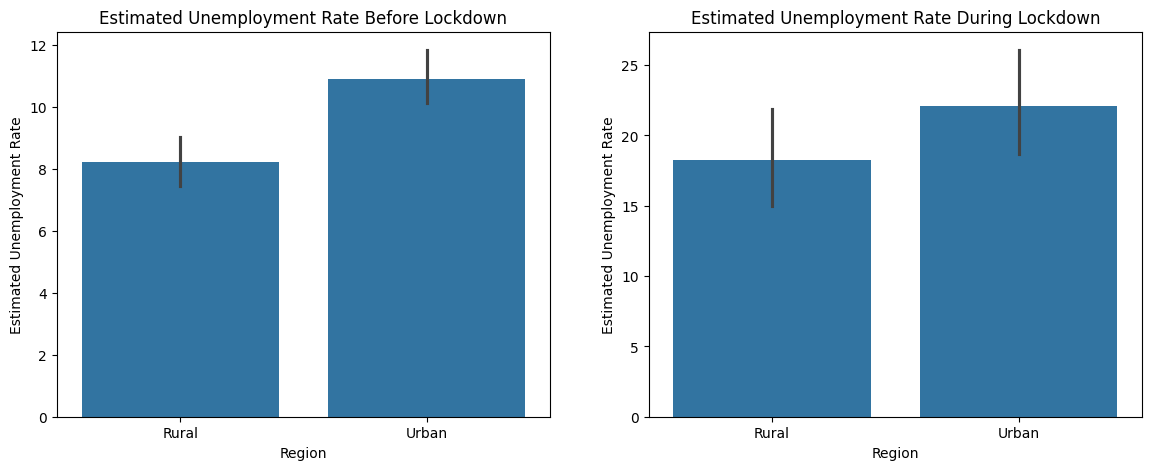

In [28]:

# Chart - 1 Bar plot visualization code for Region wise Estimated Unemployment Rate before and during lockdown

# Create a figure with two subplots side by side.
plt.figure(figsize=(14, 5))

# Subplot 1: Estimated Unemployment Rate Before Lockdown
plt.subplot(1, 2, 1)

# Create a bar plot using Seaborn to visualize the Estimated Unemployment Rate before lockdown.
sns.barplot(x='Region', y='Estimated Unemployment Rate', data=df)

# Set labels and title for the first subplot.
plt.xlabel("Region", fontsize=10)
plt.ylabel('Estimated Unemployment Rate', fontsize=10)
plt.title('Estimated Unemployment Rate Before Lockdown', fontsize=12)

# Subplot 2: Estimated Unemployment Rate During Lockdown
plt.subplot(1, 2, 2)

# Create a bar plot for the Estimated Unemployment Rate during lockdown.
sns.barplot(x='Region', y='Estimated Unemployment Rate', data=df_ld)

# Set labels and title for the second subplot.
plt.xlabel("Region", fontsize=10)
plt.ylabel('Estimated Unemployment Rate', fontsize=10)
plt.title('Estimated Unemployment Rate During Lockdown', fontsize=12)

# Display the subplots side by side.
plt.show()


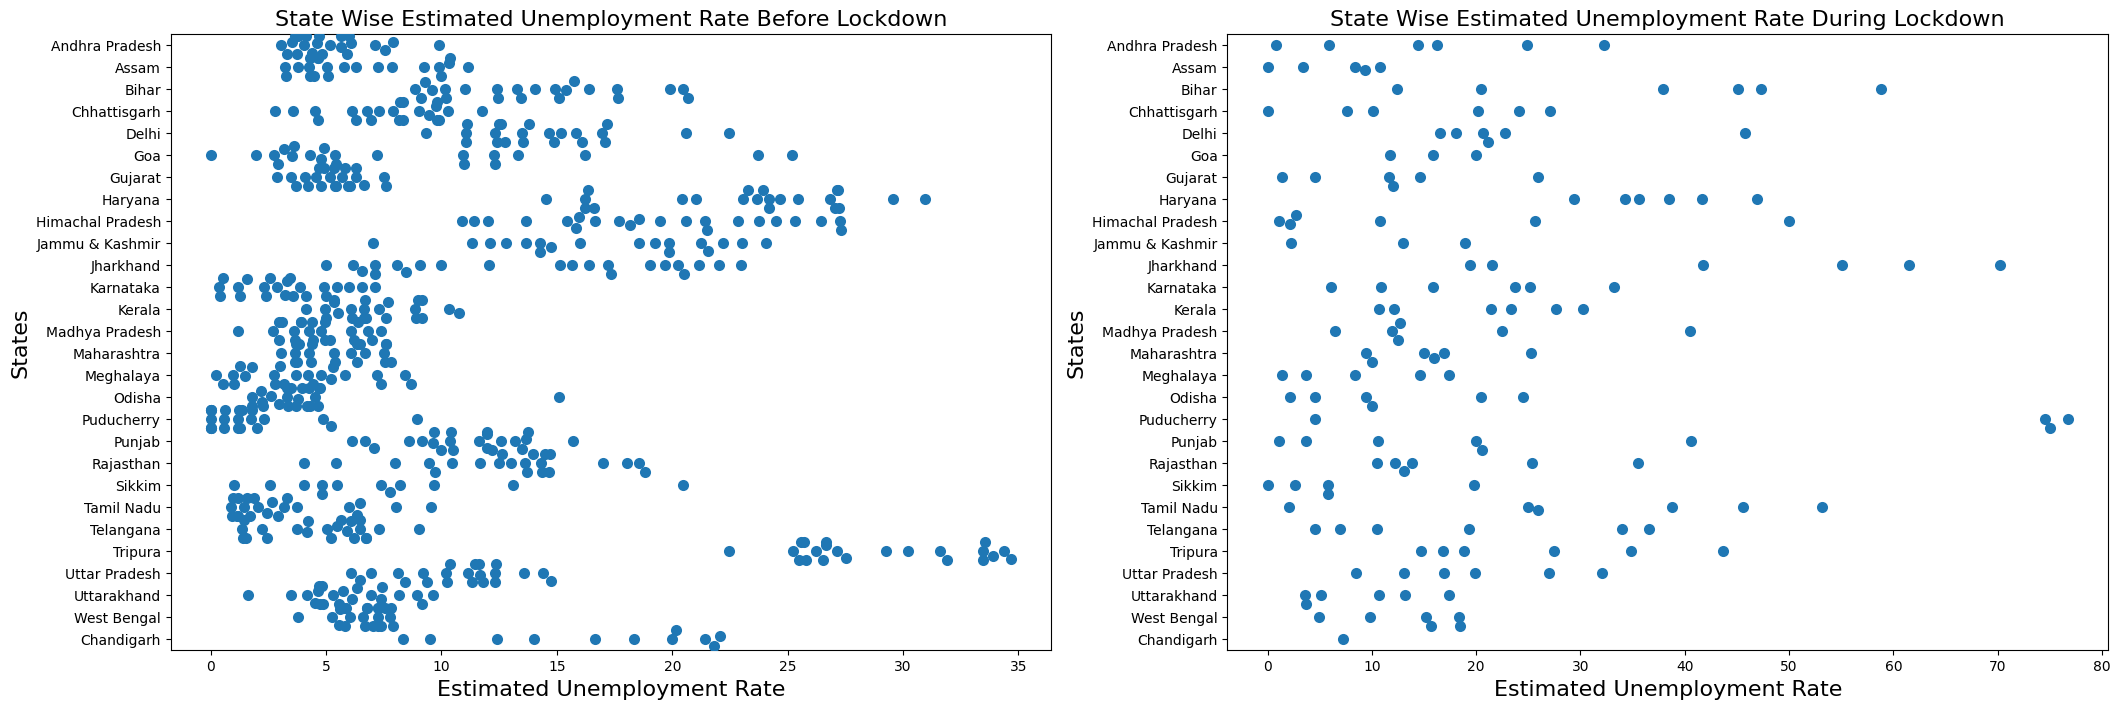

In [29]:

# Chart - 2 Swarm plot visualization code for State Wise Estimated Unemployment Rate before and during lockdown.

# Create a figure with two subplots side by side.
plt.figure(figsize=(25, 8))

# Subplot 1: State Wise Estimated Unemployment Rate Before Lockdown
plt.subplot(1, 2, 1)

# Set the title for the first subplot.
plt.title("State Wise Estimated Unemployment Rate Before Lockdown", fontsize=16)

# Create a swarm plot to visualize the Estimated Unemployment Rate before lockdown.
sns.swarmplot(y="States", x='Estimated Unemployment Rate', data=df, size=8)

# Set labels for the first subplot.
plt.xlabel("Estimated Unemployment Rate", fontsize=16)
plt.ylabel("States", fontsize=16)

# Subplot 2: State Wise Estimated Unemployment Rate During Lockdown
plt.subplot(1, 2, 2)

# Set the title for the second subplot.
plt.title("State Wise Estimated Unemployment Rate During Lockdown", fontsize=16)

# Create a swarm plot to visualize the Estimated Unemployment Rate during lockdown.
sns.swarmplot(y="States", x='Estimated Unemployment Rate', data=df_ld, size=8)

# Set labels for the second subplot.
plt.xlabel("Estimated Unemployment Rate", fontsize=16)
plt.ylabel("States", fontsize=16)

# Display the subplots side by side.
plt.show()


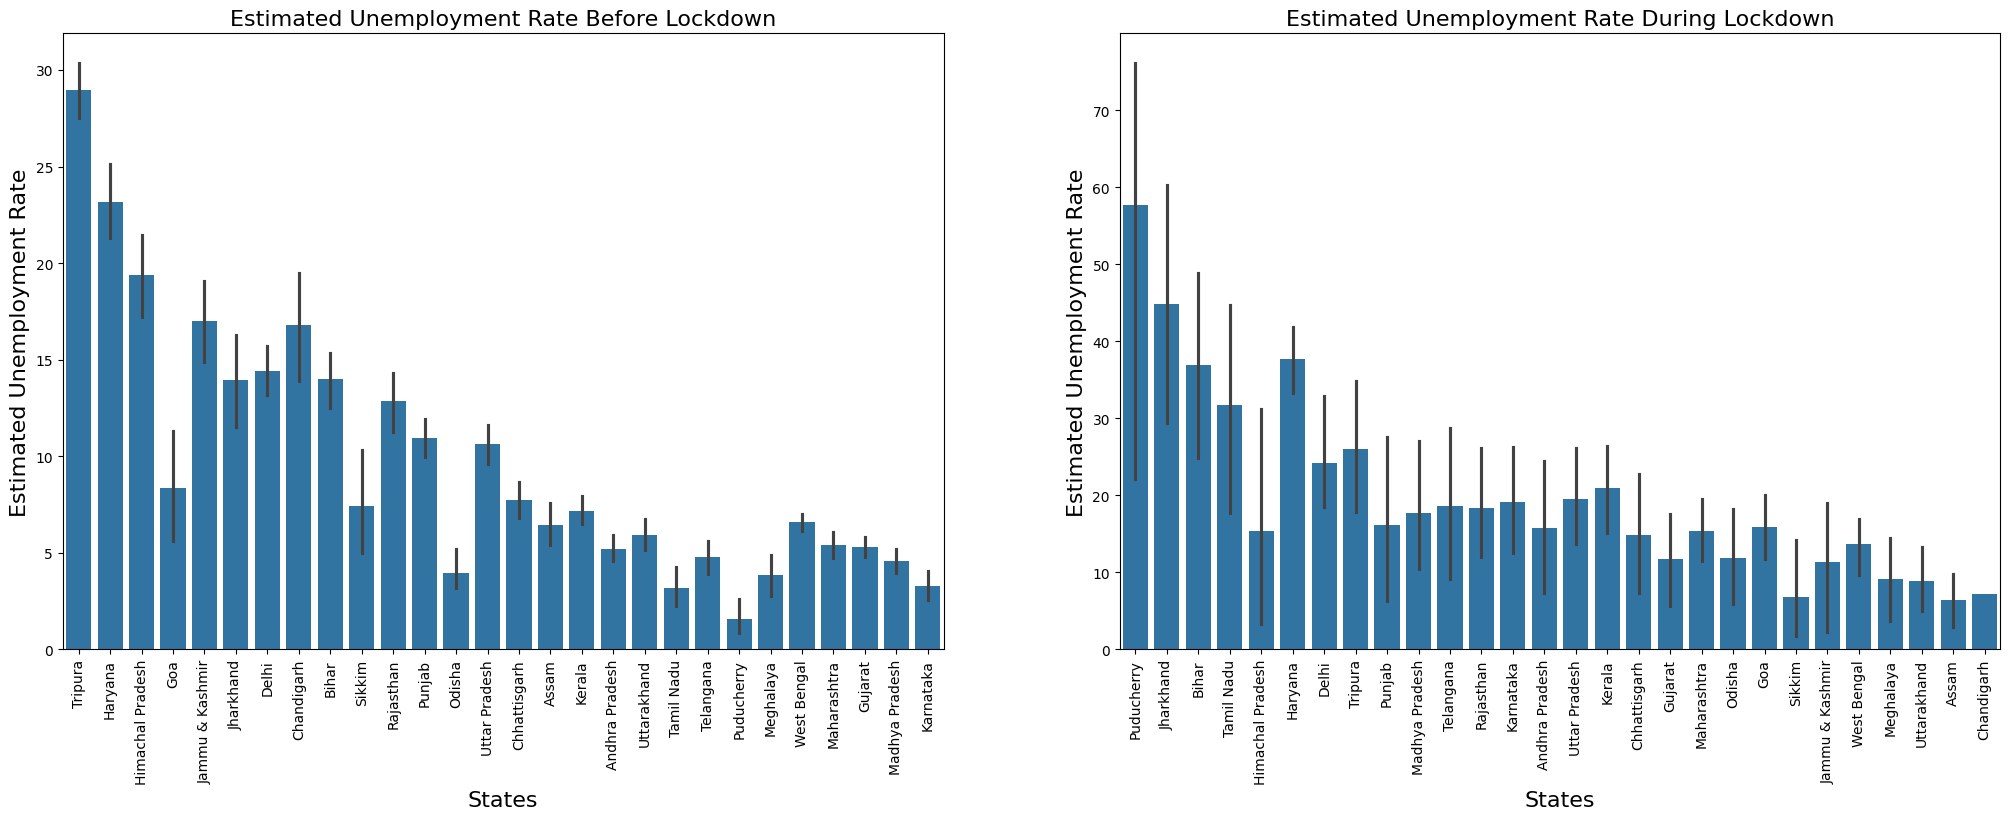

In [30]:
# Chart - 3 Bar for visualization code for State wise Estimated Unemployment Rate before and during lockdown time.

# Create a figure with two subplots side by side.
plt.figure(figsize=(25, 8))

# Subplot 1: Estimated Unemployment Rate Before Lockdown
plt.subplot(1, 2, 1)

# Set the title for the first subplot.
plt.title("Estimated Unemployment Rate Before Lockdown", fontsize=16)

# Create a bar plot to visualize the Estimated Unemployment Rate before lockdown.
sns.barplot(data=df.sort_values(by='Estimated Unemployment Rate', ascending=False), x="States", y="Estimated Unemployment Rate")
plt.xticks(rotation=90)
plt.xlabel('States', fontsize=16)
plt.ylabel('Estimated Unemployment Rate', fontsize=16)

# Subplot 2: Estimated Unemployment Rate During Lockdown
plt.subplot(1, 2, 2)

# Set the title for the second subplot.
plt.title("Estimated Unemployment Rate During Lockdown", fontsize=16)

# Create a bar plot to visualize the Estimated Unemployment Rate during lockdown.
sns.barplot(data=df_ld.sort_values(by='Estimated Unemployment Rate', ascending=False), x="States", y="Estimated Unemployment Rate")
plt.xticks(rotation=90)
plt.xlabel('States', fontsize=16)
plt.ylabel('Estimated Unemployment Rate', fontsize=16)

# Display the subplots side by side.
plt.show()

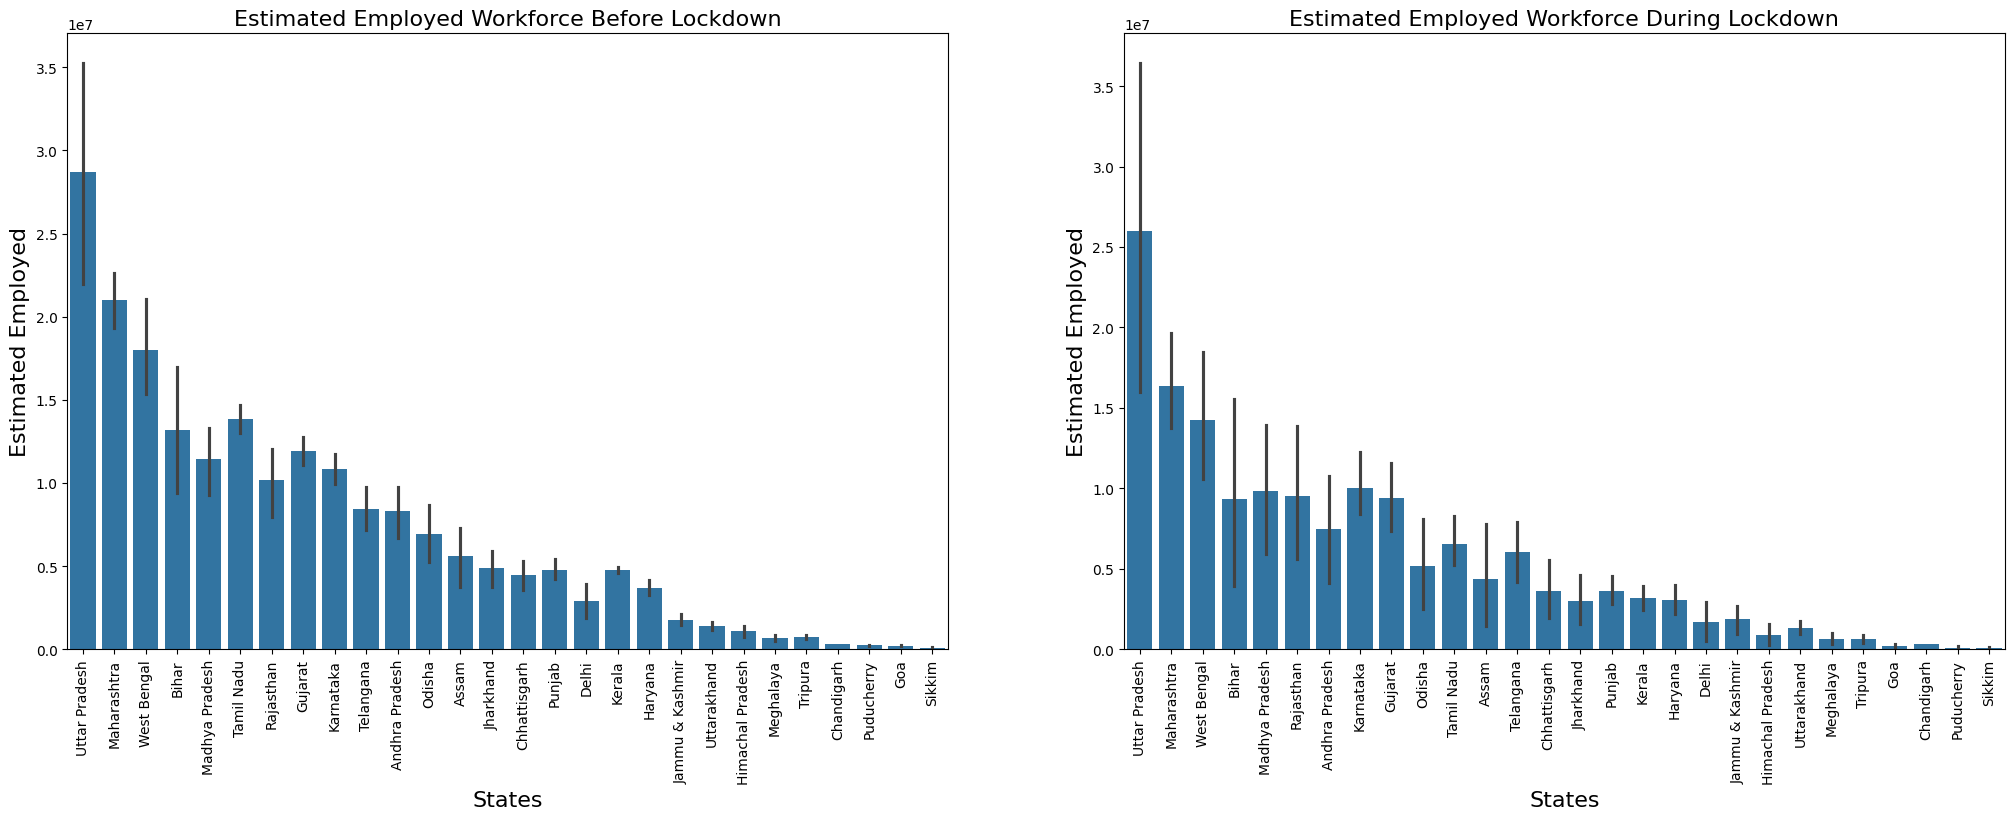

In [31]:
# Chart - 4 Bar plot visualization code for state wise Estimated Employed Workforce

# Create a figure with two subplots side by side.
plt.figure(figsize=(25, 8))

# Subplot 1: Estimated Employed Workforce Before Lockdown
plt.subplot(1, 2, 1)

# Set the title for the first subplot.
plt.title("Estimated Employed Workforce Before Lockdown", fontsize=16)

# Create a bar plot to visualize the Estimated Employed Workforce before lockdown.
sns.barplot(data=df.sort_values(by='Estimated Employed', ascending=False), x="States", y="Estimated Employed")

# Rotate x-axis labels for better readability.
plt.xticks(rotation=90)

# Set labels for the first subplot.
plt.xlabel('States', fontsize=16)
plt.ylabel('Estimated Employed', fontsize=16)

# Subplot 2: Estimated Employed Workforce During Lockdown
plt.subplot(1, 2, 2)

# Set the title for the second subplot.
plt.title("Estimated Employed Workforce During Lockdown", fontsize=16)

# Create a bar plot to visualize the Estimated Employed Workforce during lockdown.
sns.barplot(data=df_ld.sort_values(by='Estimated Employed', ascending=False), x="States", y="Estimated Employed")

# Rotate x-axis labels for better readability.
plt.xticks(rotation=90)

# Set labels for the second subplot.
plt.xlabel('States', fontsize=16)
plt.ylabel('Estimated Employed', fontsize=16)

# Display the subplots side by side.
plt.show()



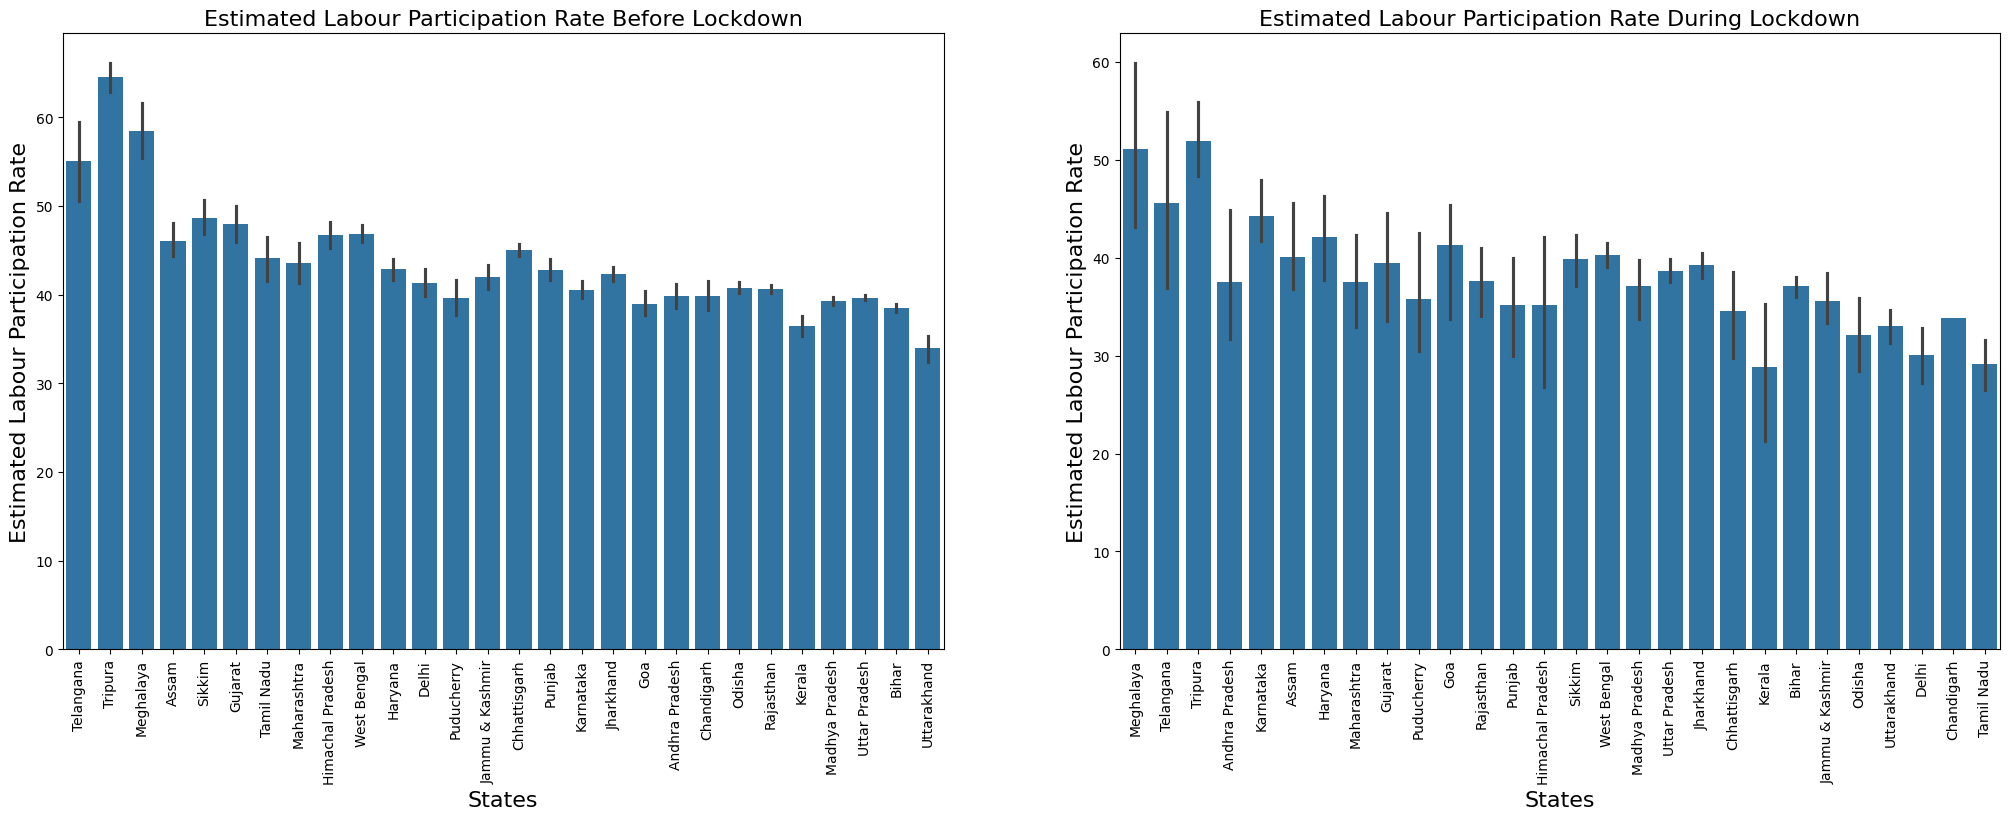

In [32]:

# Chart - 5 Bar plot visualization code for state wise Estimated Labour Participation Rate

# Create a figure with two subplots side by side.
plt.figure(figsize=(25, 8))

# Subplot 1: Estimated Labour Participation Rate Before Lockdown.
plt.subplot(1, 2, 1)

# Set the title for the first subplot.
plt.title("Estimated Labour Participation Rate Before Lockdown", fontsize=16)

# Create a bar plot to visualize the Estimated Labour Participation Rate before lockdown.
sns.barplot(data=df.sort_values(by='Estimated Labour Participation Rate', ascending=False), x="States", y="Estimated Labour Participation Rate")

# Rotate x-axis labels for better readability.
plt.xticks(rotation=90)

# Set labels for the first subplot.
plt.xlabel('States', fontsize=16)
plt.ylabel('Estimated Labour Participation Rate', fontsize=16)

# Subplot 2: Estimated Labour Participation Rate During Lockdown.
plt.subplot(1, 2, 2)

# Set the title for the second subplot.
plt.title("Estimated Labour Participation Rate During Lockdown", fontsize=16)

# Create a bar plot to visualize the Estimated Labour Participation Rate during lockdown.
sns.barplot(data=df_ld.sort_values(by='Estimated Labour Participation Rate', ascending=False), x="States", y="Estimated Labour Participation Rate")

# Rotate x-axis labels for better readability.
plt.xticks(rotation=90)

# Set labels for the second subplot.
plt.xlabel('States', fontsize=16)
plt.ylabel('Estimated Labour Participation Rate', fontsize=16)

# Display the subplots side by side.
plt.show()

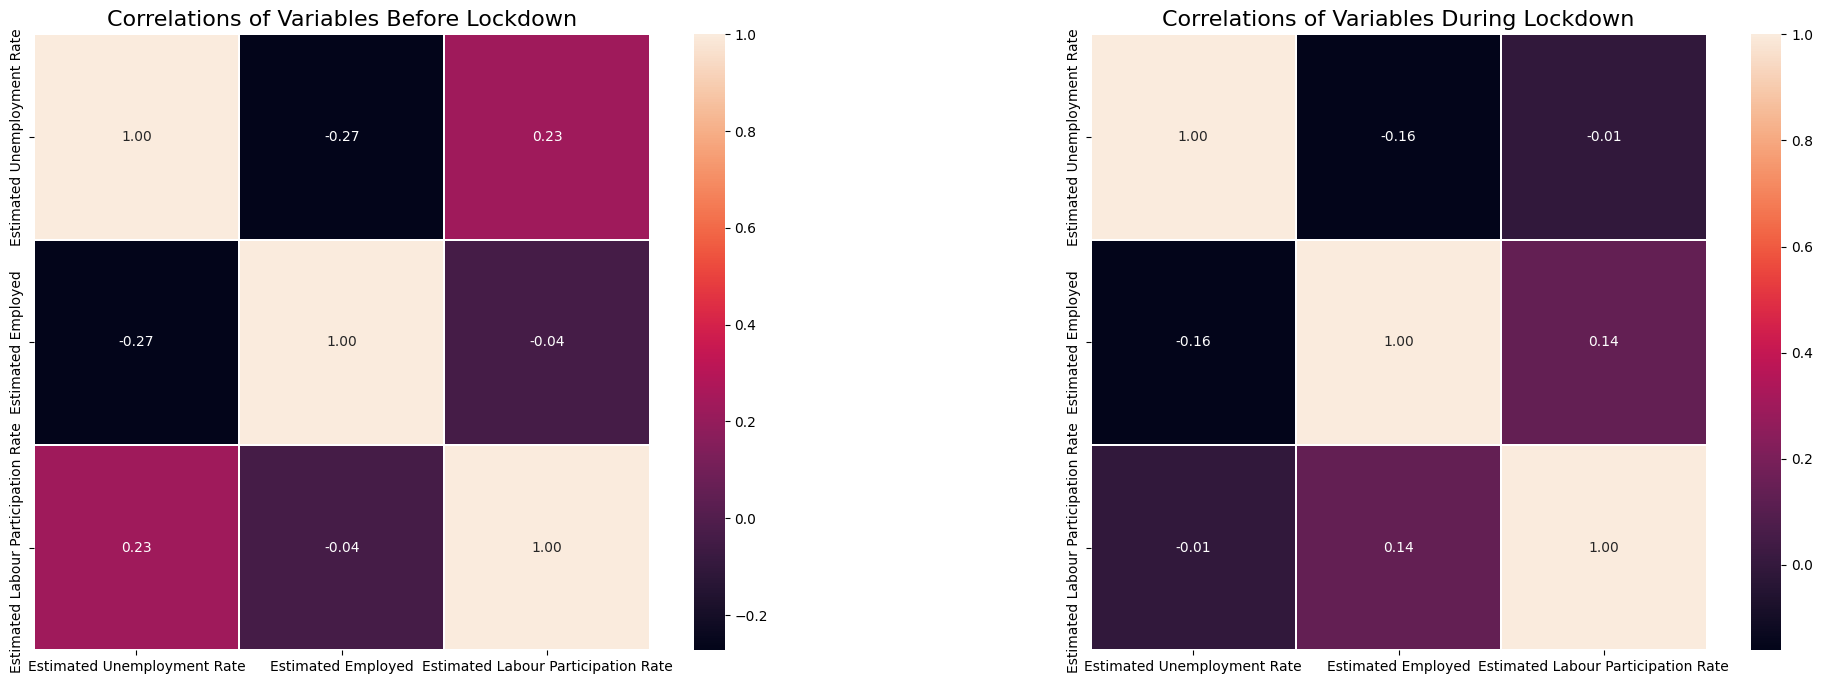

In [33]:
# Create new DataFrames
df1_stats = df[['Estimated Unemployment Rate','Estimated Employed', 'Estimated Labour Participation Rate']]

df2_stats = df_ld[['Estimated Unemployment Rate','Estimated Employed', 'Estimated Labour Participation Rate']]


# Chart - 6 Correlation heatmap visualization code

# Create a figure with two subplots side by side.
plt.figure(figsize=(25, 8))

# Subplot 1: Correlations of Variables Before Lockdown.
plt.subplot(1, 2, 1)

# Set the title for the first subplot.
plt.title("Correlations of Variables Before Lockdown", fontsize=16)

# Create a heatmap to visualize the correlations between variables in df1_stats.
sns.heatmap(df1_stats.corr(), annot=True, linewidths=0.1, fmt='.2f', square=True)

# Subplot 2: Correlations of Variables During Lockdown.
plt.subplot(1, 2, 2)

# Set the title for the second subplot.
plt.title("Correlations of Variables During Lockdown", fontsize=16)

# Create a heatmap to visualize the correlations between variables in df2_stats.
sns.heatmap(df2_stats.corr(), annot=True, linewidths=0.1, fmt='.2f', square=True)

# Display the subplots side by side.
plt.show()


# Conclusion
In this data science project, we embarked on a comprehensive analysis of the unemployment rate, a critical economic indicator, with a particular focus on the unprecedented challenges brought about by the Covid-19 pandemic. Our exploratory data analysis yielded valuable insights that shed light on the dynamics of unemployment in India.

